In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [2]:
df = pd.read_csv("student_performance_dataset.csv")
df

,Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,S147,Male,31,68.267841,86,High School,Yes,Yes,63,Pass
1,S136,Male,16,78.222927,73,PhD,No,No,50,Fail
2,S209,Female,21,87.525096,74,PhD,Yes,No,55,Fail
3,S458,Female,27,92.076483,99,Bachelors,No,No,65,Pass
4,S078,Female,37,98.655517,63,Masters,No,Yes,70,Pass
...,...,...,...,...,...,...,...,...,...,...
703,S492,Male,14,84.658761,78,PhD,Yes,No,50,Fail
704,S301,Male,35,60.278990,83,Masters,No,No,62,Pass
705,S473,Male,25,98.384969,75,Bachelors,Yes,No,57,Fail
706,S307,Female,21,96.148012,84,Bachelors,Yes,No,65,Pass


In [3]:
df.columns

Index(['Student_ID', 'Gender', 'Study_Hours_per_Week', 'Attendance_Rate',
       'Past_Exam_Scores', 'Parental_Education_Level',
       'Internet_Access_at_Home', 'Extracurricular_Activities',
       'Final_Exam_Score', 'Pass_Fail'],
      dtype='object')

In [4]:
print(df.head())

  Student_ID  Gender  Study_Hours_per_Week  Attendance_Rate  Past_Exam_Scores  \
0       S147    Male                    31        68.267841                86   
1       S136    Male                    16        78.222927                73   
2       S209  Female                    21        87.525096                74   
3       S458  Female                    27        92.076483                99   
4       S078  Female                    37        98.655517                63   

  Parental_Education_Level Internet_Access_at_Home Extracurricular_Activities  \
0              High School                     Yes                        Yes   
1                      PhD                      No                         No   
2                      PhD                     Yes                         No   
3                Bachelors                      No                         No   
4                  Masters                      No                        Yes   

   Final_Exam_Score Pass_F

## Clean the dataset

In [5]:
# Drop non-informative column
df.drop(columns=["Student_ID"], inplace=True)

In [6]:
label_encoders = {}
for column in ['Gender', 'Parental_Education_Level', 'Internet_Access_at_Home', 
               'Extracurricular_Activities', 'Pass_Fail']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

df.head()

,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,1,31,68.267841,86,1,1,1,63,1
1,1,16,78.222927,73,3,0,0,50,0
2,0,21,87.525096,74,3,1,0,55,0
3,0,27,92.076483,99,0,0,0,65,1
4,0,37,98.655517,63,2,0,1,70,1


In [14]:
# Features and target
X = df.drop("Pass_Fail", axis=1) #X: All the input features (i.e., everything except the target).
y = df["Pass_Fail"] #y: The target variable, which we’re trying to predict — in this case, whether the student passed or failed (Pass_Fail).

In [16]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
# 80% of the data used to train the models.
# 20% of the data used to test how well the models perform.
# random_state=42: Ensures reproducibility — the same split happens every time you run it.

In [18]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}
#Logistic Regression: A linear model that works well for binary classification problems.
#Decision Tree: A tree-based model that splits data based on decision rules.
#Random Forest: An ensemble model that builds multiple decision trees and averages their results (more powerful and stable than a single tree).

In [19]:
# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred, digits=4))

# Iterates over each model in the dictionary (models.items()).
# Trains the model using .fit() on training data (X_train, y_train).
# Makes predictions using .predict() on the test data (X_test).
# Prints out the evaluation metrics using classification_report():
# Precision: How many predicted “Pass” were actually correct?
# Recall: How many actual “Pass” were correctly predicted?
# F1 Score: A balance between precision and recall.
# Accuracy: Overall correct predictions / total predictions.


=== Logistic Regression ===
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        71
           1     1.0000    1.0000    1.0000        71

    accuracy                         1.0000       142
   macro avg     1.0000    1.0000    1.0000       142
weighted avg     1.0000    1.0000    1.0000       142


=== Decision Tree ===
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        71
           1     1.0000    1.0000    1.0000        71

    accuracy                         1.0000       142
   macro avg     1.0000    1.0000    1.0000       142
weighted avg     1.0000    1.0000    1.0000       142


=== Random Forest ===
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        71
           1     1.0000    1.0000    1.0000        71

    accuracy                         1.0000       142
   macro avg     1.0000    1.0000    1.0000       142

Explamation:-

71 students failed (0), and 71 passed (1)

Model predicted all correctly

Accuracy, precision, recall, and F1 are all 1.0 (perfect)


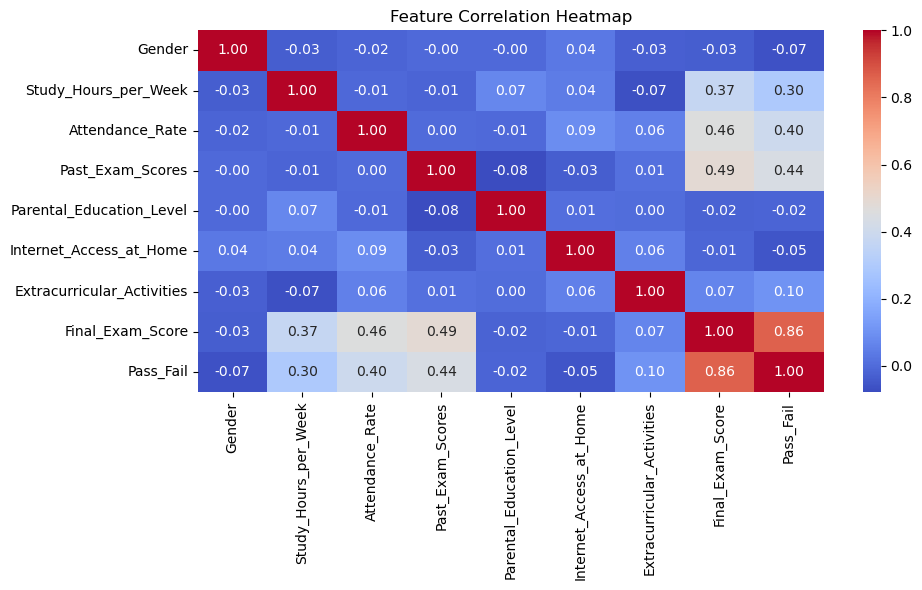

In [13]:
# Optional: Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

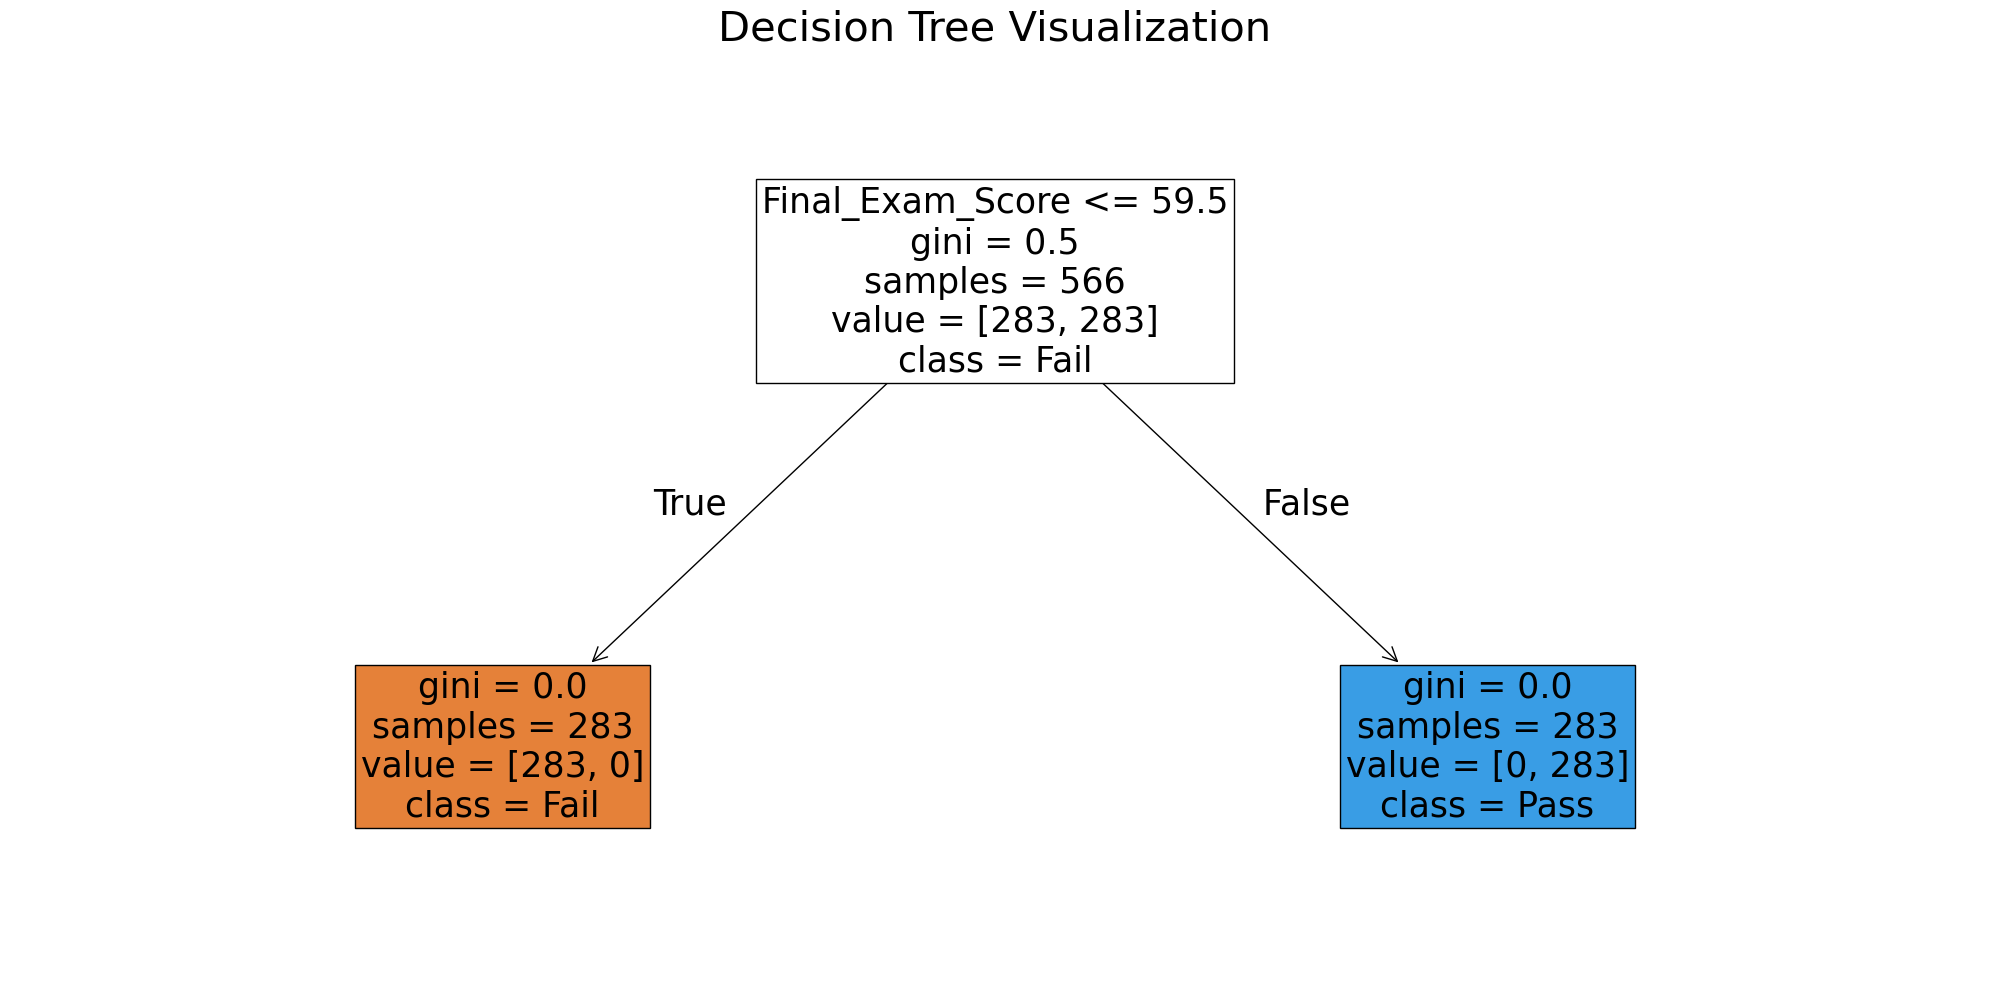

In [29]:
# Visualize the trained Decision Tree
dt_model = models["Decision Tree"]

plt.figure(figsize=(20, 10))
plot_tree(dt_model,
          feature_names=X.columns,
          class_names=label_encoders['Pass_Fail'].classes_,
          filled=True,
          fontsize=25)
plt.title("Decision Tree Visualization",fontsize=30 )
plt.tight_layout()
plt.show()

In [30]:
print(df.corr()['Pass_Fail'].sort_values(ascending=False))

Pass_Fail                     1.000000
Final_Exam_Score              0.864175
Past_Exam_Scores              0.436607
Attendance_Rate               0.396283
Study_Hours_per_Week          0.296769
Extracurricular_Activities    0.104540
Parental_Education_Level     -0.015181
Internet_Access_at_Home      -0.053829
Gender                       -0.065086
Name: Pass_Fail, dtype: float64
